In [1]:
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np


In [2]:
graph_df = pd.read_csv("DistancePlot.csv")
#plt.scatter(graph_df["Average Air Miles from US"], graph_df["Per Capita Exports"], marker="o", color="red")
graph_df["Per Capita Exports"] = graph_df["Per Capita Exports"].astype('int64')
graph_df["Average Air Miles from US"] = graph_df["Average Air Miles from US"].astype('int64')
graph_df = graph_df.rename(columns={"Population Mean": "Avg. Export Value"})
graph_df.head()


,Unnamed: 0,Unnamed: 0.1,Country Name,2007,2017,Avg. Export Value,Country Code,Population,Average Air Miles from US,Per Capita Exports
0,3,3,China,62936891576,129893586716,1.014029e+11,CHN,1378665000,7252,73
1,4,4,Japan,61159582766,67605076964,6.354828e+10,JPN,126994511,6321,500
2,5,5,United Kingdom,49981491297,56257922547,5.248949e+10,GBR,65637239,4255,799
3,6,6,Germany,49419703142,53896753486,4.941579e+10,DEU,82667685,4898,597
4,7,7,South Korea,34401709969,48326408702,4.024259e+10,KOR,51250000,6690,785


Text(0.5,1,'Population vs. Avg. Export Value for 100 Largest Overseas Export Market Countries')

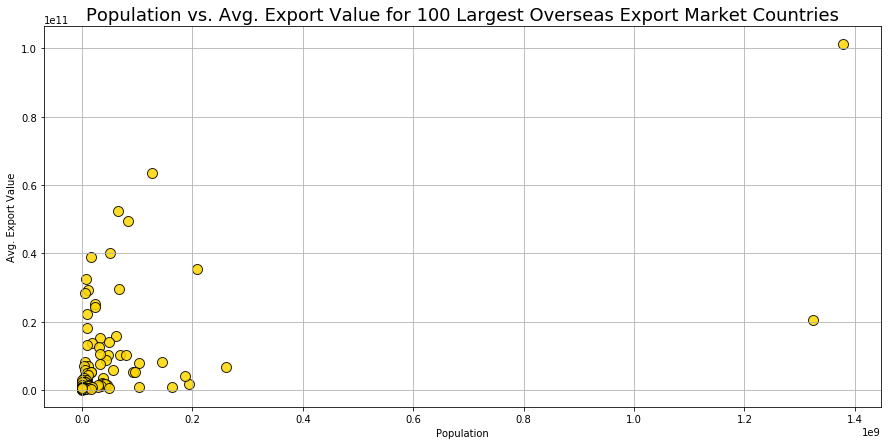

In [3]:
graph_df.plot(kind="scatter", x="Population", y="Avg. Export Value", grid=True, figsize=(15,7), s = 100,
                 
              marker="o", color="gold", alpha=.85, edgecolors="black")

plt.title("Population vs. Avg. Export Value for 100 Largest Overseas Export Market Countries", fontsize=18)

Text(0.5,1,'Distance vs. Per Capita Exports for 100 Largest Overseas Export Market Countries')

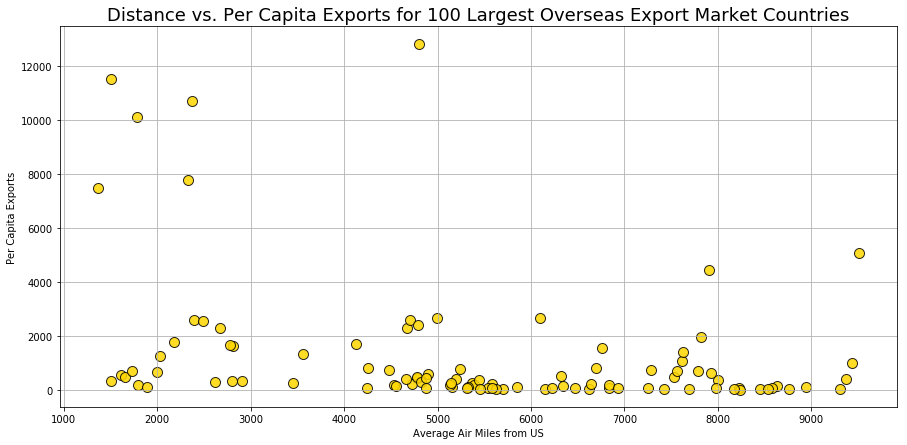

In [11]:
graph_df.plot(kind="scatter", x="Average Air Miles from US", y="Per Capita Exports", grid=True, figsize=(15,7), s = 100,
                 
              marker="o", color="gold", alpha=.85, edgecolors="black")

plt.title("Distance vs. Per Capita Exports for 100 Largest Overseas Export Market Countries", fontsize=18)

In [4]:
from statistics import median
arr = np.array(graph_df["Per Capita Exports"])
mid = median(arr)
# Use numpy to create quartiles
q1 = np.percentile(arr, 25)
q3 = np.percentile(arr,75)
# Print the quartiles
print(f"Q1 is {q1}")
print(f"Q3 is {q3}")
# Calculate the interquartile range
iqr = (q3 - q1)
print("interquartile range:", iqr)
# Find lower boundary
# Q1 - 1.5 * IQR
lower_boundary = q1 - (1.5 * iqr)
lower_boundary
# Find upper boundary
# Q3 + 1.5 * IQR
upper_boundary = q3 + (1.5 * iqr)
upper_boundary
# Check for any lower outliers
arr[arr <= lower_boundary]
# Check for any upper outliers
arr[arr >= upper_boundary]

Q1 is 75.25
Q3 is 1103.25
interquartile range: 1028.0


array([ 4431,  5064,  7468, 12842,  7765, 11540, 10111,  2667, 10698],
      dtype=int64)

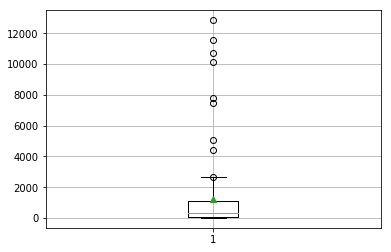

In [5]:
# Create box plot
plt.boxplot(arr, showmeans=True)
plt.grid()
plt.show()

In [6]:
pop_one = graph_df.loc[graph_df["Average Air Miles from US"] < 3300, :]
# usa_ufo_df = clean_ufo_df.loc[clean_ufo_df["country"] == "us", :]
# usa_ufo_df.head()
len(pop_one)
stats.ttest_1samp(pop_one["Per Capita Exports"], graph_df["Per Capita Exports"].mean())

Ttest_1sampResult(statistic=2.114488270630928, pvalue=0.04660353236767158)